# Playing around with Keras machine learning..

Scaling up from difficulty.

Fully-Connected network (Forward model)

# Packages

In [1]:
from keras.models import Model, Sequential
from keras.layers import Input, ZeroPadding2D
from keras.layers import Dense, BatchNormalization
from keras.layers.merge import concatenate
from keras.optimizers import Adam, RMSprop
from keras.layers import Dense, Activation, Flatten, Reshape, Conv2D
from keras.layers import Conv2DTranspose, UpSampling2D, LeakyReLU, Dropout
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Using TensorFlow backend.


# Load Data

In [2]:
# Load the Drive helper and mount (Authorization)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
import h5py
import pandas as pd
os.chdir('/content/drive/My Drive/LLNL')

In [4]:
def load_data(train_path,test_path):
    # read in Data
    tests_data = test_path ; train_data = train_path;
    ts_df = h5py.File(tests_data,'r') ; tr_df = h5py.File(train_data,'r') ;
    # Scan for images and grab labels
    y_train = np.array(tr_df['images'])
    X_train = np.array([tr_df['images'][i][0] for i in y_train])
    y_test = np.array(ts_df['images'])
    X_test = np.array([ts_df['images'][i][0] for i in y_test])
    # close h5py
    ts_df.close() ; tr_df.close()
    return (X_train*1.0, X_test*1.0)

train_path = 'new_training_data.h5'
test_path = 'new_test_data.h5'
(X_train, X_test) = load_data(train_path,test_path)
X_train.shape # images will be labels for this model.

(16771, 100, 100)

In [0]:
# Parameter Data to use
train_df = pd.read_csv("param_search.csv", sep = ",")
test_df = pd.read_csv("param_search2.csv", sep = ",")

# Manipulate Data

In [6]:
# Resizing data to 50 by 50 image. (Not necessary for 100 by 100 images)
import scipy.ndimage as ndi
X_train = ndi.zoom(X_train, (1, 1, 1), order=2)
X_test = ndi.zoom(X_test, (1, 1, 1), order=2)
np.shape(X_train) + np.shape(X_test)

(16771, 100, 100, 7214, 100, 100)

In [0]:
# Normalize Data.
X_train = (X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train))
X_test = (X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test))

# Keras Sequential Model..

In [8]:
model = Sequential()
# Hidden Layer
model.add(Dense(64, activation='relu', input_shape=(3,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
# Interpretation layer
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(625, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(625, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
# output layer
model.add(Dense(10000, activation=None))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 512)               131584    
_________________________________________________________________
batch_normalization_1

In [0]:
model.compile(loss='mean_squared_error',optimizer=Adam(lr=0.0001),metrics=['mean_squared_error'])

# Training Model

In [10]:
model.fit(train_df,np.reshape(X_train,(16771,10000)), batch_size = 75, epochs = 100, shuffle = True) 

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
16771/16771 [==============================] - 12s 725us/step - loss: 0.0544 - mean_squared_error: 0.0544
Epoch 2/100
16771/16771 [==============================] - 9s 530us/step - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 3/100
16771/16771 [==============================] - 9s 527us/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 4/100
16771/16771 [==============================] - 9s 528us/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 5/100
16771/16771 [==============================] - 9s 528us/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 6/100
16771/16771 [==============================] - 9s 529us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 7/100
16771/16771 [==============================] - 9s 529us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 8/100
16771/16771 [==============================] - 9s 527us/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 9/100
167

# Predictions

First image is out of sample. Second image is out of sample.

In [11]:
# Grab image from dataset.
print(train_df.iloc[50:51,])
print(test_df.iloc[100:101,])

           p        phi       theta
50 -0.786348  56.876568  101.787616
            p   phi       theta
100 -0.786348  90.0  164.850871


### Out of Sample

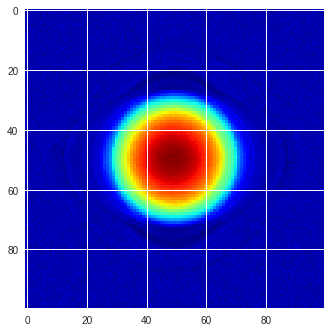

In [12]:
huh = model.predict(test_df.iloc[5220:5221,])
plt.imshow(np.reshape(huh,(100,100)),cmap = 'jet')

Real Image Comparison for Out of Sapmle

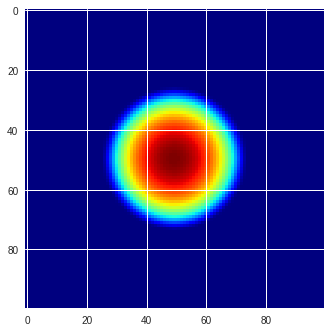

In [13]:
plt.imshow(np.reshape(X_test[5220], (100,100)), cmap = 'jet')

### In Sample

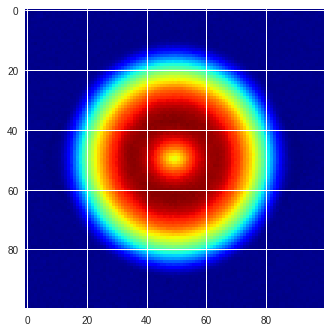

In [14]:
huh = model.predict(train_df.iloc[1014:1015,])
plt.imshow(np.reshape(huh,(100,100)),cmap = 'jet')

Real image for in sample

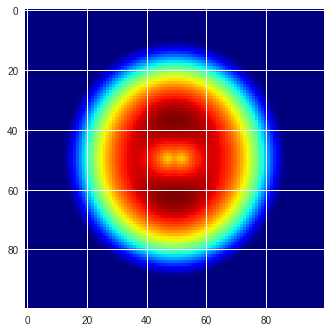

In [15]:
plt.imshow(np.reshape(X_train[1015], (100,100)), cmap = 'jet')

# Evaluate/Benchmark model

In [16]:
model.evaluate(test_df, np.reshape(X_test,(7214,10000))) # Test < train. Good sign but 100 epochs may be a bit too many.

7214/7214 [==============================] - 1s 196us/step


[0.00012534627915959667, 0.00012534627915959667]

# Save Model

In [0]:
model.save('keras_128.h5')

### What is being saved
- Weights
- Training Configuration
- Optimizer state
- Architecture

# Load the model...

In [0]:
from keras.models import load_model
param_plasma = load_model('keras_128.h5')

In [19]:
# Generate Random values.
p = np.random.uniform(-10, 10, 1)
theta = np.random.uniform(0, 90, 1)
phi = np.random.uniform(0,180, 1)
trial = [p,theta,phi]
check = pd.DataFrame([trial], columns= ['p','phi','theta'])
check

,p,phi,theta
0,[5.027945732074485],[11.045763191700054],[116.94659834705374]


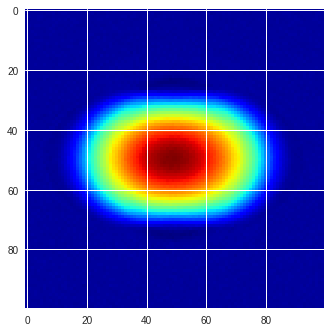

In [20]:
# Predict
hmm = param_plasma.predict(check.iloc[0:1])
plt.imshow(np.reshape(hmm,(100,100)),cmap = 'jet')

### Compare with closest image from database